In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:


# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



626

In [4]:
# Url and units
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

        

In [5]:


# List for holding reponse information
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")

City processed: hervey bay
City processed: dikson
City NOT found: barentsburg
City processed: new norfolk
City processed: mehamn
City processed: mangai
City processed: oyama
City processed: chuy
City processed: asau
City processed: victoria
City processed: grindavik
City processed: lebu
City processed: ushuaia
City processed: avarua
City processed: cape town
City processed: rikitea
City processed: puerto narino
City processed: saint-philippe
City processed: faanui
City processed: monrovia
City processed: khatanga
City processed: muros
City processed: egvekinot
City processed: atuona
City processed: roma
City processed: bluff
City processed: bengkulu
City processed: busselton
City processed: lagoa
City processed: okmulgee
City processed: morant bay
City processed: hithadhoo
City processed: mahebourg
City processed: boa vista
City processed: east london
City processed: puerto ayora
City processed: mount pleasant
City processed: svetlaya
City NOT found: taolanaro
City NOT found: manikchha

City processed: chauk
City processed: vardo
City processed: atherton
City NOT found: gollere
City processed: tevaitoa
City processed: turukhansk
City processed: alihe
City processed: iquitos
City processed: henties bay
City processed: bonthe
City processed: ilulissat
City processed: chengde
City processed: sisimiut
City NOT found: guelengdeng
City processed: preeceville
City processed: kargil
City NOT found: tunduru
City processed: torrington
City processed: sao joao da barra
City processed: xinmin
City processed: pishin
City processed: shenjiamen
City processed: vrangel
City processed: general roca
City processed: fortuna
City processed: hendek
City processed: alekseyevsk
City processed: la rioja
City NOT found: uzumlu
City processed: salym
City processed: biak
City processed: codrington
City processed: pahrump
City processed: pak phanang
City processed: umm kaddadah
City NOT found: ji-parana
City processed: wanning
City processed: ust-tsilma
City processed: razole
City processed: ixt

In [6]:
Weather_DF = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [27]:


# Extract relevant fields from the data frame
City_Data = Weather_DF[["City","Country", "Latitude", "Longitude", "Temperature", "Humidity", "Cloudiness", "Windspeed", "Date"]]

# Export the City_Data into a csv
#Windows path
City_Data.to_csv(r'C:\Users\farow\OneDrive\Documents\Bootcamp\Challenge_6\output_data\City_Data.csv', index = False)
City_Data.head()



,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Date
0,hervey bay,AU,-25.2986,152.8535,79.16,79,27,3.33,1678662809
1,dikson,RU,73.5069,80.5464,-23.51,100,100,8.41,1678663007
2,new norfolk,AU,-42.7826,147.0587,61.92,53,47,3.00,1678663008
3,mehamn,NO,71.0357,27.8492,10.35,85,0,10.36,1678663008
4,mangai,CD,-4.0500,19.5333,71.37,98,100,2.17,1678663009


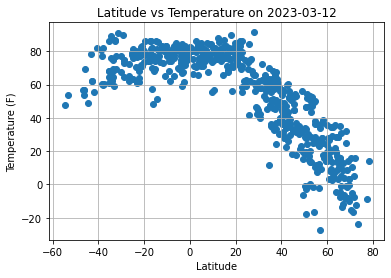

In [11]:
#format the max date in the dataset as "runDate" for graph titles
endRunDate = City_Data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = City_Data["Latitude"]
y = City_Data["Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#export as png
plt.savefig(f'output_data/Latitude vs Temperature on {runDate}.png')
#display plot!
plt.show()

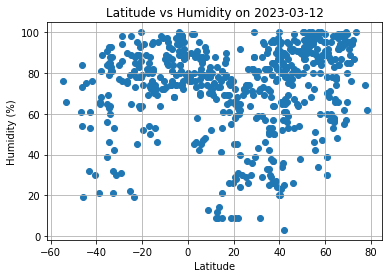

In [12]:


#set data to plot; retain Latitude from previous plot as "x"
h = City_Data["Humidity"]
plt.scatter(x,h)
plt.title(f"Latitude vs Humidity on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f'output_data/Latitude vs Humidity on {runDate}.png')
plt.show()



<function matplotlib.pyplot.show(*args, **kw)>

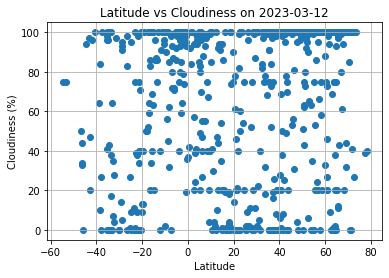

In [13]:


c = City_Data["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'output_data/Latitude vs Cloudiness on {runDate}.png')
plt.show

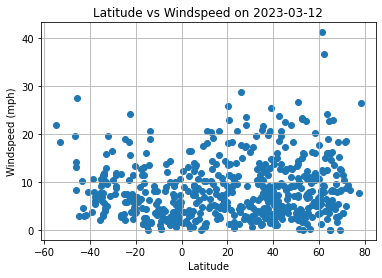

In [14]:


ws = City_Data["Windspeed"]
plt.scatter(x,ws)
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig(f'output_data/Latitude vs Windspeed on {runDate}.png')
plt.show()



In [15]:
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [16]:


# Create Northern and Southern Hemisphere DataFrames
#pull loc above and below the equator; note any cities directly on the equator (i.e. latitude = 0) are excluded
Northern_DF = Weather_DF.loc[Weather_DF["Latitude"] > 0]
Southern_DF = Weather_DF.loc[Weather_DF["Latitude"] < 0]



The r-square is -0.8839159571958695
y = -1.24x + 93.28


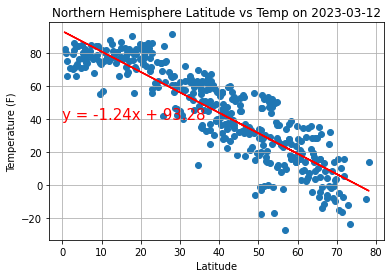

In [17]:
#set the data sets to compare
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

There is a relatively strong correlation between temperature and latitude for the Northern Hemisphere.

The r-square is 0.4216989591300201
y = 0.28x + 79.01


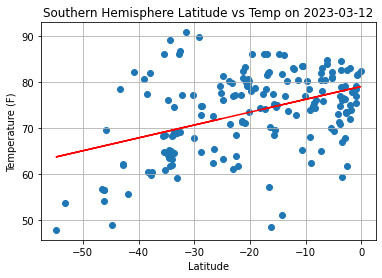

In [18]:


x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()



Temperature and latitude do not show a strong correlation in the Southern Hemisphere.

The r-square is 0.2941186598942326
y = 0.34x + 58.99


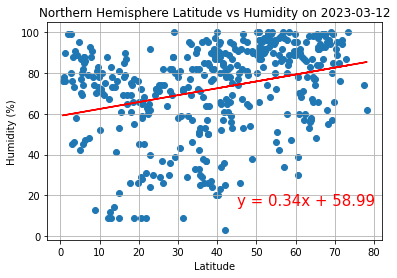

In [19]:


x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()



There is almost no correlation between humidity and latitude in the Northern Hemisphere.

The r-square is 0.44773081624920785
y = 0.6x + 88.24


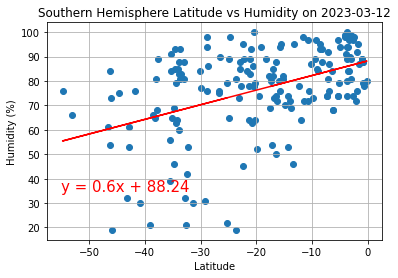

In [28]:


x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()



As in the Northern Hemisphere, the Southern Hemisphere shows little correlation between latitude and humidity.

The r-square is 0.186138332942856
y = 0.37x + 48.41


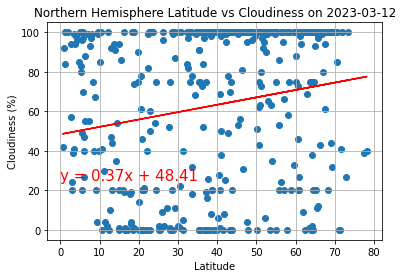

In [21]:


x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()



There isn't a correlation between cloudiness and latitude in the Northern Hemisphere.

The r-square is 0.37675103444163366
y = 1.05x + 81.54


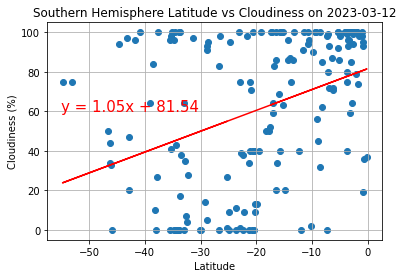

In [22]:

x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

There is little correlation between cloudiness and latitude in the Southern Hemisphere.

The r-square is 0.07378376498932908
y = 0.02x + 7.92


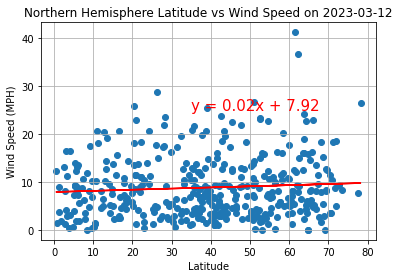

In [23]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

There isn't a correlation between wind speed and latitude in the Northern Hemisphere.

The r-square is -0.4057155004501771
y = -0.15x + 4.11


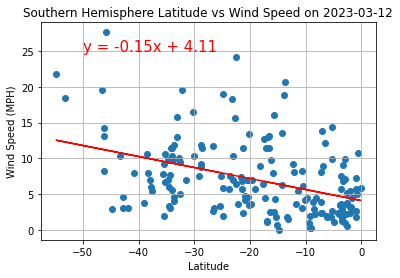

In [24]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'output_data/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

There is a very week negative correlation between wind speed and latitude in the Southern Hemisphere.